# Import necessary libraries

In [41]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization
from keras import regularizers
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from keras.applications.vgg16 import VGG16
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [2]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


## fix this function 

In [3]:
#work on this
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy vs epochs')
    plt.ylabel('accuracy')
    plt.xlabel('no. of epochs')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss vs epochs')
    plt.ylabel('loss')
    plt.xlabel('no. of epochs')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Load dataset

In [4]:
train_path= 'train'
valid_path = 'valid'
test_path = 'test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)


Found 280 images belonging to 4 classes.
Found 35 images belonging to 4 classes.
Found 35 images belonging to 4 classes.


## Make sure data loaded is in proper format 

In [6]:
assert train_batches.num_classes == test_batches.num_classes == valid_batches.num_classes ==4

In [7]:
imgs, labels = next(train_batches)

In [8]:
#plot images 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

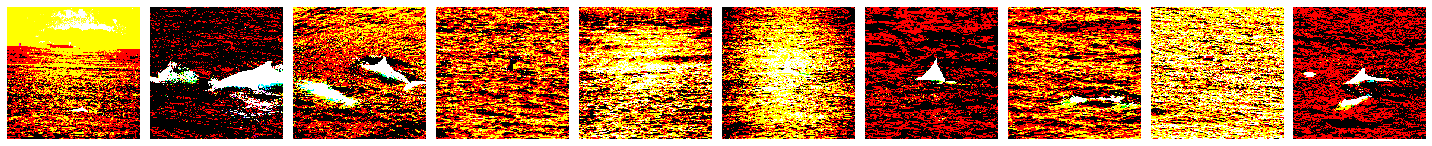

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [9]:
plotImages(imgs)
print(labels)

# First model

In [10]:
model1 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding ='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=4, activation='softmax'),
])

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 802820    
Total params: 822,212
Trainable params: 822,212
Non-trainable params: 0
__________________________________________________

In [12]:
model1.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history1 = model1.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
28/28 - 61s - loss: 54.2965 - accuracy: 0.3107 - val_loss: 15.4075 - val_accuracy: 0.4286
Epoch 2/10
28/28 - 59s - loss: 10.3633 - accuracy: 0.5786 - val_loss: 7.2676 - val_accuracy: 0.4571
Epoch 3/10
28/28 - 59s - loss: 1.9602 - accuracy: 0.8107 - val_loss: 6.7020 - val_accuracy: 0.4857
Epoch 4/10
28/28 - 59s - loss: 2.3169 - accuracy: 0.7750 - val_loss: 8.9141 - val_accuracy: 0.4286
Epoch 5/10
28/28 - 58s - loss: 1.6710 - accuracy: 0.8393 - val_loss: 4.4233 - val_accuracy: 0.6857
Epoch 6/10
28/28 - 59s - loss: 0.2221 - accuracy: 0.9464 - val_loss: 4.5313 - val_accuracy: 0.5714
Epoch 7/10
28/28 - 59s - loss: 0.0375 - accuracy: 0.9929 - val_loss: 2.7973 - val_accuracy: 0.6000
Epoch 8/10
28/28 - 58s - loss: 1.5227e-04 - accuracy: 1.0000 - val_loss: 2.8075 - val_accuracy: 0.6000
Epoch 9/10
28/28 - 58s - loss: 3.1948e-05 - accuracy: 1.0000 - val_loss: 2.7484 - val_accuracy: 0.6000
Epoch 10/10
28/28 - 58s - loss: 2.6399e-05 - accuracy: 1.0000 - val_loss: 2.7262 - val_accuracy: 0

In [14]:
#overfitting problem ^

In [15]:
plot_history(history1)

KeyError: 'acc'

## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

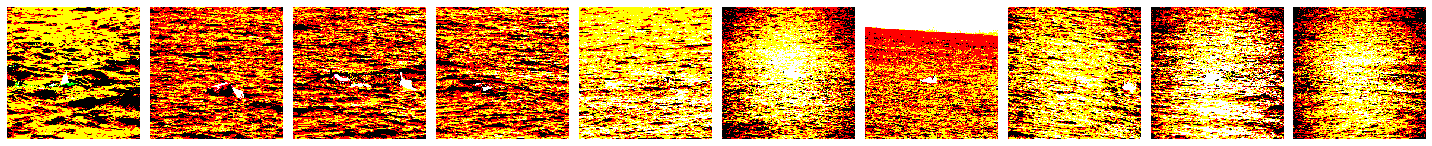

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [16]:
test_imgs , test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [17]:
#test data is not shuffled 
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [18]:
#verbose =0 , to get no output 
predictions= model1.predict(x=test_batches, verbose=0)

In [19]:
#highest probability from the model , the labels are predicted by the models 
np.round(predictions)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [20]:
# passing our true labels with test_batches, and passing predicted labels from models(using argmax for most probable model)
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions,axis=-1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [22]:
#order of confusion matrix 
test_batches.class_indices

{'health': 0, 'one': 1, 'two': 2, 'unused': 3}

Confusion matrix, without normalization
[[6 0 4 0]
 [1 4 0 0]
 [2 3 5 0]
 [2 0 2 6]]


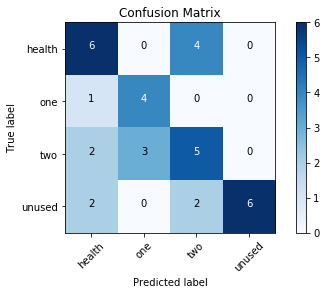

In [23]:
cm_plot_labels = ['health', 'one', 'two' , 'unused']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title='Confusion Matrix')

# VGG model

In [30]:
#download the VGG model 
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 68s 0us/step


In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
model_vgg = Sequential()
for layer in vgg16_model.layers[:-4]:
    model_vgg.add(layer)

In [48]:
model_vgg.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [53]:
#set training of each layer to be false 
for layer in model_vgg.layers:
    layer.trainable=False

In [54]:
#Dense(units=4, activation='softmax'),
#model1.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model_vgg.add(Flatten())
model_vgg.add(Dense(500, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(300, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(100, activation = 'relu'))
model_vgg.add(BatchNormalization())
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(4, activation = 'softmax'))


In [51]:
#VGG with custom 3 layers 
#def build_vgg_model():
#     vgg_model = Sequential()
#     vgg_model.add(model_vgg)
#     vgg_model.add(Flatten())
#     vgg_model.add(Dense(500, activation = 'relu'))
#     vgg_model.add(BatchNormalization())
#     vgg_model.add(Dropout(0.5))
#     vgg_model.add(Dense(300, activation = 'relu'))
#     vgg_model.add(BatchNormalization())
#     vgg_model.add(Dropout(0.5))
#     vgg_model.add(Dense(100, activation = 'relu'))
#     vgg_model.add(BatchNormalization())
#     vgg_model.add(Dropout(0.5))
#     vgg_model.add(Dense(4, activation = 'softmax'))
#     vgg_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#     return vgg_model

In [55]:
model_vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [56]:
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model_vgg.fit(x=train_batches,validation_data=valid_batches,epochs=20,verbose=2)

Epoch 1/20
28/28 - 63s - loss: 0.7543 - accuracy: 0.7286 - val_loss: 0.4709 - val_accuracy: 0.8286
Epoch 2/20
28/28 - 61s - loss: 0.6537 - accuracy: 0.7750 - val_loss: 0.4729 - val_accuracy: 0.8000
Epoch 3/20
28/28 - 61s - loss: 0.5268 - accuracy: 0.7929 - val_loss: 0.4714 - val_accuracy: 0.8000
Epoch 4/20
28/28 - 60s - loss: 0.5585 - accuracy: 0.7821 - val_loss: 0.4787 - val_accuracy: 0.8000
Epoch 5/20
28/28 - 60s - loss: 0.6751 - accuracy: 0.7607 - val_loss: 0.4992 - val_accuracy: 0.7714
Epoch 6/20
28/28 - 60s - loss: 0.5558 - accuracy: 0.7929 - val_loss: 0.4881 - val_accuracy: 0.7429
Epoch 7/20
28/28 - 61s - loss: 0.5019 - accuracy: 0.8036 - val_loss: 0.5056 - val_accuracy: 0.7714
Epoch 8/20
28/28 - 61s - loss: 0.4963 - accuracy: 0.8071 - val_loss: 0.4998 - val_accuracy: 0.7714
Epoch 9/20
28/28 - 61s - loss: 0.4620 - accuracy: 0.8393 - val_loss: 0.4928 - val_accuracy: 0.7714
Epoch 10/20
28/28 - 61s - loss: 0.5358 - accuracy: 0.7964 - val_loss: 0.5169 - val_accuracy: 0.7714
Epoch 11/

# Predict the fine tune VGG-16 model

In [60]:
predictions = model_vgg.predict(x=test_batches, verbose=0)

In [61]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [62]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [63]:
test_batches.class_indices 

{'health': 0, 'one': 1, 'two': 2, 'unused': 3}

Confusion matrix, without normalization
[[ 5  0  4  1]
 [ 0  5  0  0]
 [ 0  1  9  0]
 [ 0  0  0 10]]


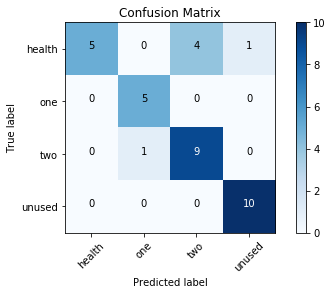

In [64]:
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')